In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [22]:
file=pd.read_csv(r"D:\city_hour.csv")
file

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707870,Visakhapatnam,2020-06-30 20:00:00,9.50,36.00,2.75,25.57,15.85,4.57,0.62,NaN,27.75,NaN,NaN,NaN,51.0,Satisfactory
707871,Visakhapatnam,2020-06-30 21:00:00,17.25,49.25,3.62,33.20,20.62,3.78,0.76,2.02,25.58,NaN,NaN,NaN,51.0,Satisfactory
707872,Visakhapatnam,2020-06-30 22:00:00,36.00,71.00,2.20,30.80,18.20,3.67,0.58,1.77,26.15,NaN,NaN,NaN,50.0,Good
707873,Visakhapatnam,2020-06-30 23:00:00,15.75,63.00,1.02,28.90,16.00,3.80,0.49,0.75,15.82,NaN,NaN,NaN,50.0,Good


In [23]:
file.isnull()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,False,False,True,True,False,False,False,True,False,False,True,False,False,False,True,True
1,False,False,True,True,False,False,False,True,False,False,True,False,False,False,True,True
2,False,False,True,True,False,False,False,True,False,False,True,False,False,False,True,True
3,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True
4,False,False,True,True,False,False,False,True,False,False,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707870,False,False,False,False,False,False,False,False,False,True,False,True,True,True,False,False
707871,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False
707872,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False
707873,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False


In [24]:
print(file.isnull().count())
missing_data = file.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

City          707875
Datetime      707875
PM2.5         707875
PM10          707875
NO            707875
NO2           707875
NOx           707875
NH3           707875
CO            707875
SO2           707875
O3            707875
Benzene       707875
Toluene       707875
Xylene        707875
AQI           707875
AQI_Bucket    707875
dtype: int64
City
City
False    707875
Name: count, dtype: int64

Datetime
Datetime
False    707875
Name: count, dtype: int64

PM2.5
PM2.5
False    562787
True     145088
Name: count, dtype: int64

PM10
PM10
False    411138
True     296737
Name: count, dtype: int64

NO
NO
False    591243
True     116632
Name: count, dtype: int64

NO2
NO2
False    590753
True     117122
Name: count, dtype: int64

NOx
NOx
False    584651
True     123224
Name: count, dtype: int64

NH3
NH3
False    435333
True     272542
Name: count, dtype: int64

CO
CO
False    621358
True      86517
Name: count, dtype: int64

SO2
SO2
False    577502
True     130373
Name: count, dtype: int64


In [25]:
'''cols_to_fill = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene','AQI']

for col in cols_to_fill:
    file[col] = file[col].fillna(file[col].median())'''

"cols_to_fill = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',\n       'O3', 'Benzene', 'Toluene', 'Xylene','AQI']\n\nfor col in cols_to_fill:\n    file[col] = file[col].fillna(file[col].median())"

In [26]:
file = file.dropna()

In [27]:
file.isnull()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
50888,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
50889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
50890,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
50893,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
50894,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707863,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
707864,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
707865,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
707866,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [28]:
pollutants = file.drop(['City','Datetime', 'AQI_Bucket', 'Benzene', 'Toluene', 'Xylene', 'SO2'], axis=1)
pollutants


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,O3,AQI
50888,104.00,148.50,1.93,23.00,13.75,9.80,0.10,117.62,155.0
50889,94.50,142.00,1.33,16.25,9.75,9.65,0.10,136.23,159.0
50890,82.75,126.50,1.47,14.83,9.07,9.70,0.10,149.92,173.0
50893,68.50,117.00,1.35,13.60,8.35,7.40,0.10,161.70,191.0
50894,69.25,112.25,1.52,11.80,7.55,9.25,0.10,161.68,191.0
...,...,...,...,...,...,...,...,...,...
707863,12.75,45.00,0.55,17.20,9.32,9.12,0.11,45.80,50.0
707864,10.75,36.75,1.10,17.75,10.28,4.65,0.34,50.73,51.0
707865,15.75,30.25,0.95,13.75,8.07,4.67,0.30,41.55,51.0
707866,14.00,29.50,1.77,20.70,12.45,8.08,0.45,39.23,51.0


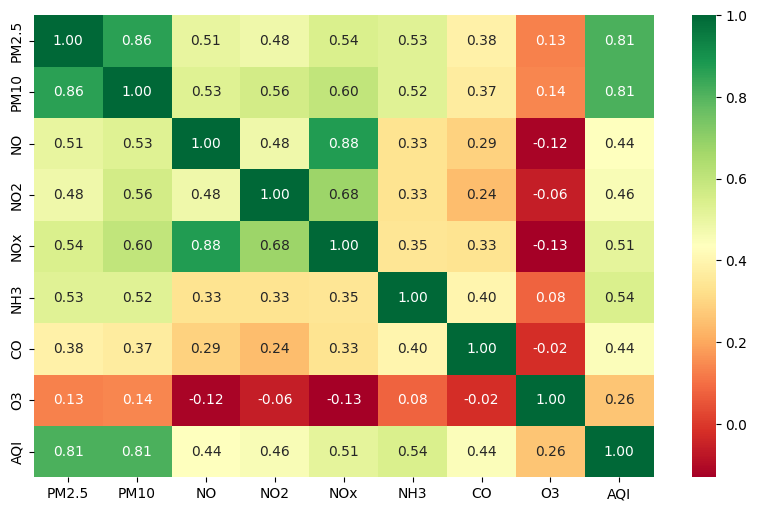

In [29]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = pollutants.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,6))
#plot heat map
g=sns.heatmap(pollutants[top_corr_features].corr(),annot=True,cmap="RdYlGn", fmt=".2f")

In [30]:
selected_features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'CO', 'O3', 'NH3']

In [31]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(pollutants[selected_features], pollutants['AQI'], test_size=0.2, random_state=42)

In [33]:
X_train.head()

,PM2.5,PM10,NO,NO2,NOx,CO,O3,NH3
289275,93.58,163.96,18.57,45.82,42.00,0.89,64.93,41.39
396652,48.10,140.65,5.41,44.50,27.18,0.72,18.37,24.59
184326,48.09,81.85,21.12,8.08,19.50,0.62,2.19,15.57
371815,11.25,57.83,1.73,8.95,3.08,0.14,24.83,3.85
287953,52.01,105.41,8.50,25.56,22.11,0.85,58.29,28.19


In [13]:
random_forest_model = RandomForestRegressor(random_state=42, n_estimators = 200)
random_forest_model.fit(X_train, y_train)
y_pred_random_forest = random_forest_model.predict(X_test)

In [34]:
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = np.mean(np.abs(y_pred - y_test))
    r2 = r2_score(y_true, y_pred)
    print("-----------------------------------------------------------------")
    print("Performance metrics for {model_name}:")
    print("Mean Squared Error:", mse)
    print('MAE:', mae)
    print("R-squared:", r2)
    print("Regression score")
    print("Training Accuracy: ",random_forest_model.score(X_train, y_train)*100)
    print("Testing Accuracy: ",random_forest_model.score(X_test, y_test)*100)
    print("-----------------------------------------------------------------")

evaluate_model(y_test, y_pred_random_forest, 'Random Forest Regression')

-----------------------------------------------------------------
Performance metrics for {model_name}:
Mean Squared Error: 1311.1454448851332
MAE: 23.663132348391088
R-squared: 0.8632922346241688
Regression score
Training Accuracy:  98.09266361117727
Testing Accuracy:  86.32922346241688
-----------------------------------------------------------------


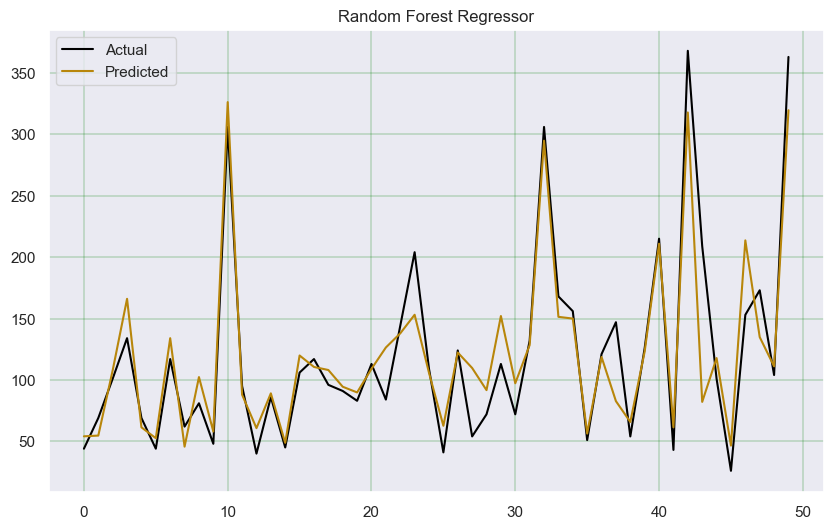

<Figure size 1200x800 with 0 Axes>

In [40]:
y_test_array = y_test[:50]
y_pred_random_forest_array = y_pred_random_forest[:50]
df1 = pd.DataFrame({'Actual': y_test_array.ravel(), 'Predicted': y_pred_random_forest_array.ravel()})
df1.plot(kind='line', color=['black', 'darkgoldenrod'])
plt.title("Random Forest Regressor")
plt.grid(which='major', linestyle='-', linewidth='0.25', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.25', color='black')
plt.figure(figsize=(12, 8))
plt.show()

In [36]:
result = pd.DataFrame()
result["ACTUAL AQI"] = y_test_array
result["PREDICTED AQI"] = y_pred_random_forest_array
result["DIFFERENCE"] = result["PREDICTED AQI"] - result["ACTUAL AQI"]
result["PERCENTAGE ERROR"] = ( abs(result["PREDICTED AQI"] - result["ACTUAL AQI"] ) / result["ACTUAL AQI"] ) * 100
result.head(10)

,ACTUAL AQI,PREDICTED AQI,DIFFERENCE,PERCENTAGE ERROR
185024,44.0,54.085,10.085,22.920455
688199,69.0,54.680,-14.320,20.753623
701188,101.0,107.815,6.815,6.747525
291304,134.0,166.035,32.035,23.906716
68812,69.0,61.395,-7.605,11.021739
62189,44.0,52.560,8.560,19.454545
702809,117.0,133.980,16.980,14.512821
474012,62.0,45.680,-16.320,26.322581
379627,81.0,102.320,21.320,26.320988
466659,48.0,57.995,9.995,20.822917


**Mean Squared Error (MSE)**: A measure of how close the predicted values are to the actual values. A lower MSE indicates a better fit between the model and the data.

**Mean Absolute Error(MAE)**: A value of MAE indicates that the average absolute error between the predicted and actual values is about 23.66 units. This is also a reasonable.

**R-squared**: A measure of how well the model explains the variance in the data. An R-squared value of 1 indicates that the model perfectly explains the data, while a value of 0 indicates that the model does not explain any of the variance in the data.

**Training Accuracy**: The percentage of training data points that the model correctly predicted.

**Testing Accuracy**: The percentage of testing data points that the model correctly predicted.

Overall, the performance metrics of Random Forest regressor is a good fit for the data. The MSE is relatively low, the R-squared value is high, and the training and testing accuracies are both good. This suggests that the model is able to accurately predict the AQI values for both training and unseen data.



**Predictive Analysis** - **Image 1**
The scatter plot is colored according to the residual (actual - predicted) value, with red indicating high residuals and blue indicating low residuals.

The image shows that the random forest regressor is able to make accurate predictions for most of the data points. The image suggests that the random forest regressor is a promising model for AQI prediction. 

**Predictive Analysis** - **Image 2**

The residual plot shows the relationship between the predicted AQI values and the residuals (actual - predicted) values.

The image shows that the residuals are randomly distributed around zero, which indicates that the model is not biased towards any particular values. This is a good sign, as it suggests that the model is able to capture the underlying relationships in the data.

Overall, the residual plot suggests that the linear regression model is a good fit for the data